In [1]:
import numpy as np
import os
from pathlib import Path
from keras.preprocessing import image
import keras
import matplotlib.pyplot as plt
from keras.layers import *
from keras.utils import np_utils
from keras import Sequential
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Dataset Preparation

In [2]:
p=Path("Pokemon-Dataset/")
p

PosixPath('Pokemon-Dataset')

In [3]:
files = p.glob("*") #glob function return path and accept regular expressioin
for fi in files:
    print(fi)

Pokemon-Dataset/Psyduck
Pokemon-Dataset/Squirtle
Pokemon-Dataset/Charmander
Pokemon-Dataset/Onix
Pokemon-Dataset/Bulbasaur
Pokemon-Dataset/Arcanine
Pokemon-Dataset/Poliwhirl
Pokemon-Dataset/Mewtwo
Pokemon-Dataset/Spearow
Pokemon-Dataset/Pikachu


In [4]:
X_img , Y_label = list() , list()

files = p.glob("*")
label_dict = {'Squirtle':0,'Spearow':1,'Psyduck':2,'Charmander':3 , 'Bulbasaur':4 , 'Pikachu':5 , 'Arcanine':6,'Mewtwo':7, 'Onix':8 , 'Poliwhirl':9}
label_to_name = {0:'Squirtle',1:'Spearow',2:'Psyduck',3:'Charmander',4:'Bulbasaur',5:'Pikachu',6:'Arcanine',7:'Mewtwo',8:'Onix',9:'Poliwhirl'}

for imgfile in files:

    label = str(imgfile).split("/")[-1]
    
    cnt=0
    
    print(imgfile)
    
    for image_path in imgfile.glob("*.jpg"):
        img=image.load_img(image_path,target_size = (100,100))
        
        img_arr = image.img_to_array(img)
        
        X_img.append(img_arr)
        Y_label.append(label_dict[label])
        
        cnt+=1
        
    print(cnt)


Pokemon-Dataset/Psyduck
158
Pokemon-Dataset/Squirtle
186
Pokemon-Dataset/Charmander
200
Pokemon-Dataset/Onix
64
Pokemon-Dataset/Bulbasaur
174
Pokemon-Dataset/Arcanine
61
Pokemon-Dataset/Poliwhirl
63
Pokemon-Dataset/Mewtwo
192
Pokemon-Dataset/Spearow
130
Pokemon-Dataset/Pikachu
199


In [5]:
len(X_img),len(Y_label)

(1427, 1427)

In [6]:
X = np.array(X_img , dtype = "float32")
Y = np.array(Y_label)

In [7]:
print(X.shape,Y.shape)

(1427, 100, 100, 3) (1427,)


In [ ]:
# X = np.array(image_data)
# Y = np.array(labels)

# #Shuffle our data
# #combined = list(zip(X,Y))
# #random.shuffle(combined)
# #X[:],Y[:] = zip(*combined) 

# from sklearn.utils import shuffle
# X,Y = shuffle(X,Y,random_state=2)

# #Normalisation
# X = X/255.0


## Ploting Of Pokemon Image

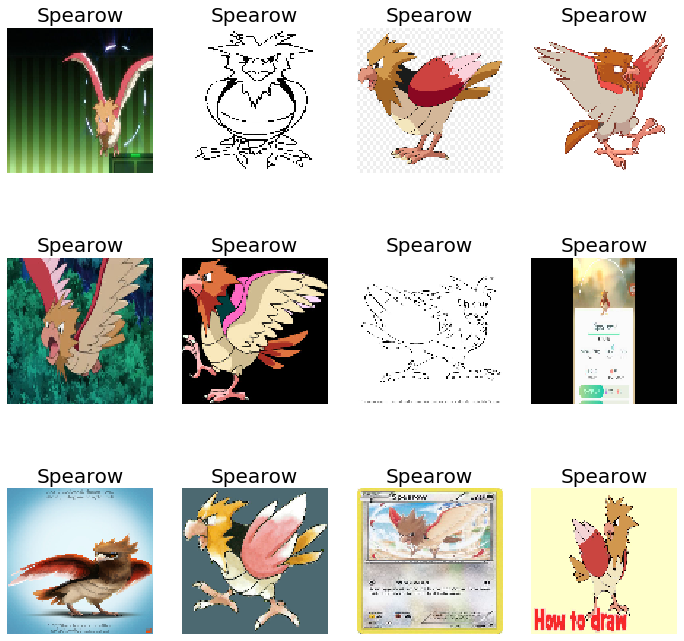

In [8]:
def plot_pokemon(x,y):
    
    plt.figure(0,figsize=(12,12))
    
    for i in range(1,13):
        plt.subplot(3,4,i)
        plt.title("{}".format(label_to_name[y[i]]),fontsize=20)
        plt.axis("off")
        plt.imshow(x[i],cmap='rainbow')
    plt.show()    
plot_pokemon(X[1200:1266,:]/255,Y[1200:1260])

## Preprocessing of Dataset

In [9]:
X=X[:,:]/255
x_train , x_test , y_train , y_test =train_test_split(X,Y)

In [10]:
s = x_train.shape , y_train .shape ,x_test.shape , y_test.shape
s

((1070, 100, 100, 3), (1070,), (357, 100, 100, 3), (357,))

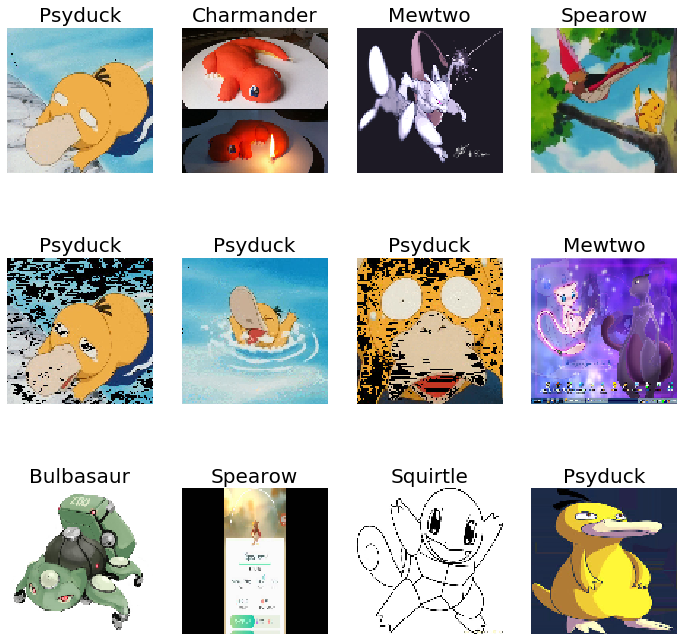

In [11]:
plot_pokemon(x_train[98:200],y_train[98:200])

In [12]:
X_train=x_train.reshape(x_train.shape[0],-1)
X_test=x_test.reshape(x_test.shape[0],-1)
print(X_train.shape , X_test.shape)


(1070, 30000) (357, 30000)


In [13]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

print(Y_train.shape , Y_test.shape)

(1070, 10) (357, 10)


## Keras Model for Classification

In [14]:
model = Sequential()

inp_size = 30000
model.add(Dense(1500,input_shape = (inp_size,)))
model.add(Activation("sigmoid"))

model.add(Dense(750))
model.add(Activation("tanh"))

model.add(Dense(250))
model.add(Activation("tanh"))

model.add(Dense(128))
model.add(Activation("tanh"))

model.add(Dense(64))
model.add(Activation("tanh"))

model.add(Dense(10))
model.add(Activation("softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1500)              45001500  
_________________________________________________________________
activation_1 (Activation)    (None, 1500)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 750)               1125750   
_________________________________________________________________
activation_2 (Activation)    (None, 750)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               187750    
_________________________________________________________________
activation_3 (Activation)    (None, 250)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32128     
__________

## Training of model

In [16]:
model.compile(loss = "categorical_crossentropy",optimizer = "sgd",metrics = ["accuracy"])

In [17]:
pok = model.fit( x=X_train,
    y=Y_train,
    batch_size=150,
    epochs=50,
    verbose=1,
    callbacks=None,
    validation_split=0.0,
    validation_data=(X_test,Y_test),
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    )

Instructions for updating:
Use tf.cast instead.
Train on 1070 samples, validate on 357 samples
Epoch 1/50
1070/1070 [==============================] - 6s 5ms/step - loss: 2.2493 - acc: 0.1421 - val_loss: 2.6087 - val_acc: 0.1036
Epoch 2/50
1070/1070 [==============================] - 4s 4ms/step - loss: 2.2184 - acc: 0.2103 - val_loss: 2.1889 - val_acc: 0.2017
Epoch 3/50
1070/1070 [==============================] - 4s 4ms/step - loss: 2.1134 - acc: 0.2486 - val_loss: 2.1975 - val_acc: 0.2997
Epoch 4/50
1070/1070 [==============================] - 4s 4ms/step - loss: 2.0686 - acc: 0.2991 - val_loss: 2.1709 - val_acc: 0.1793
Epoch 5/50
1070/1070 [==============================] - 4s 4ms/step - loss: 2.0235 - acc: 0.2748 - val_loss: 2.1918 - val_acc: 0.2045
Epoch 6/50
1070/1070 [==============================] - 4s 4ms/step - loss: 1.9899 - acc: 0.2981 - val_loss: 2.3889 - val_acc: 0.2045
Epoch 7/50
1070/1070 [==============================] - 4s 4ms/step - loss: 1.9725 - acc: 0.3037 - va

## Loss and Accuracy Graph

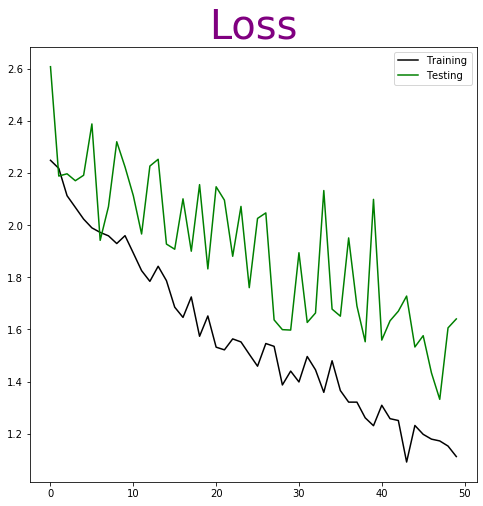

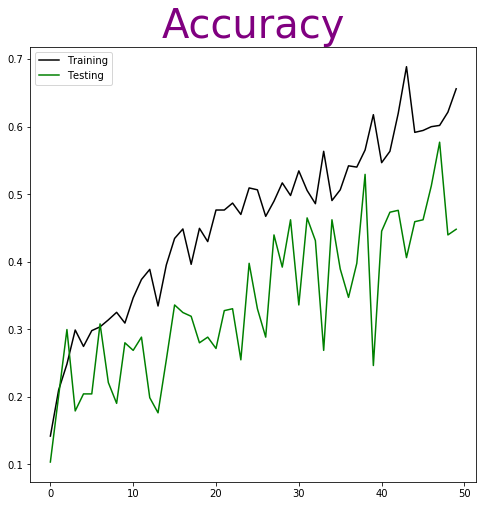

In [18]:
plt.figure(0,figsize=(8,8))
plt.title("Loss",fontsize=40,color="purple")
plt.plot(pok.history["loss"],color="black",label="Training")
plt.plot(pok.history["val_loss"],color="green",label="Testing")
plt.legend()
plt.show()


plt.figure(1,figsize=(8,8))
plt.title("Accuracy",fontsize=40,color="purple")
plt.plot(pok.history["acc"],color="black",label="Training",)
plt.plot(pok.history["val_acc"],color="green",label="Testing")
plt.legend()
plt.show()

## Prediction Using Model

In [19]:
prediction=model.predict(X_test)
print(prediction.shape)
pred=list()
for i in prediction:
    pred.append(i.argmax())
pred=np.array(pred)
np.sum(np.array(pred)==y_test)/Y_test.shape[0]

(357, 10)


0.4481792717086835

In [22]:
X_test[1].shape

(30000,)

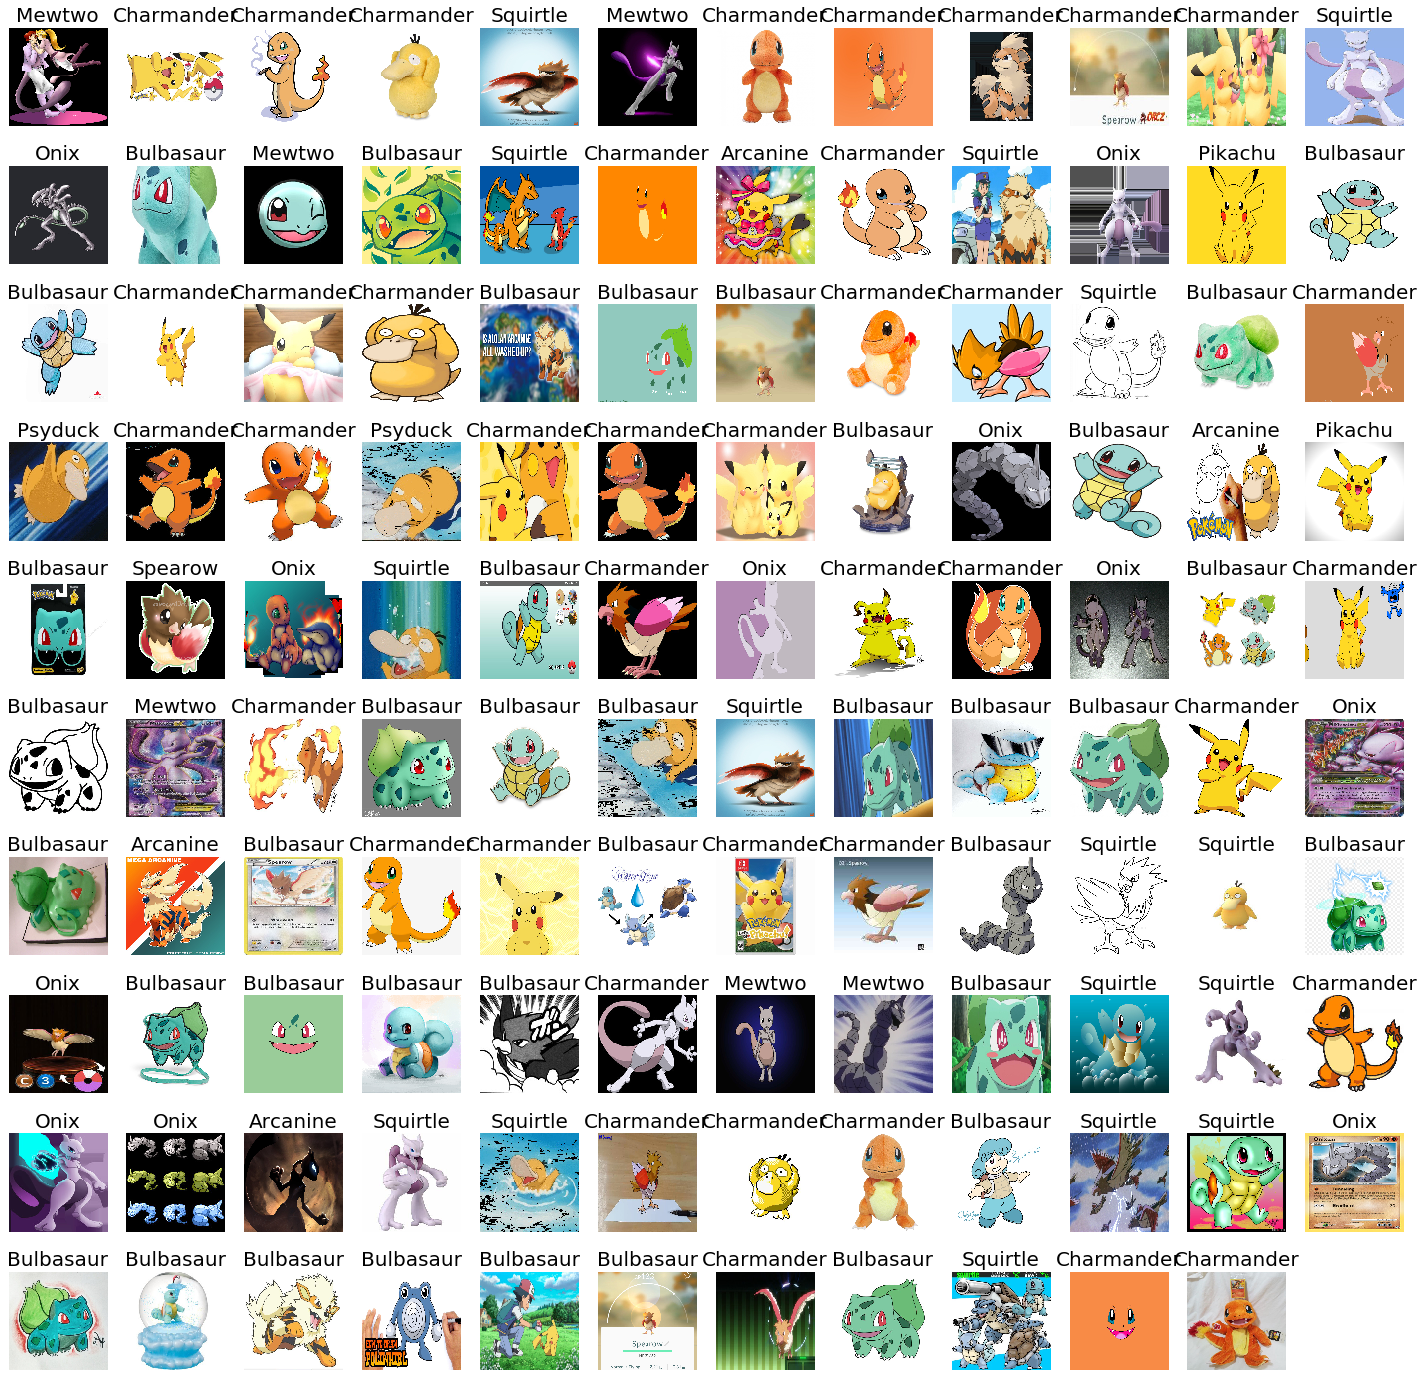

In [23]:

plt.figure(0,figsize=(25,25))

for i in range(1,120):
    plt.subplot(10,12,i)
    plt.title("{}".format(label_to_name[pred[i]]),fontsize=20)
    plt.axis("off")
    plt.imshow(X_test[i].reshape(100,100,3),cmap='rainbow')
plt.show()  

In [26]:
prediction1=model.predict(X_train)
print(prediction1.shape)
pred1=list()
for i in prediction1:
    pred1.append(i.argmax())
pred1=np.array(pred1)
np.sum(np.array(pred1)==y_train)/Y_train.shape[0]

(1070, 10)


0.5719626168224299

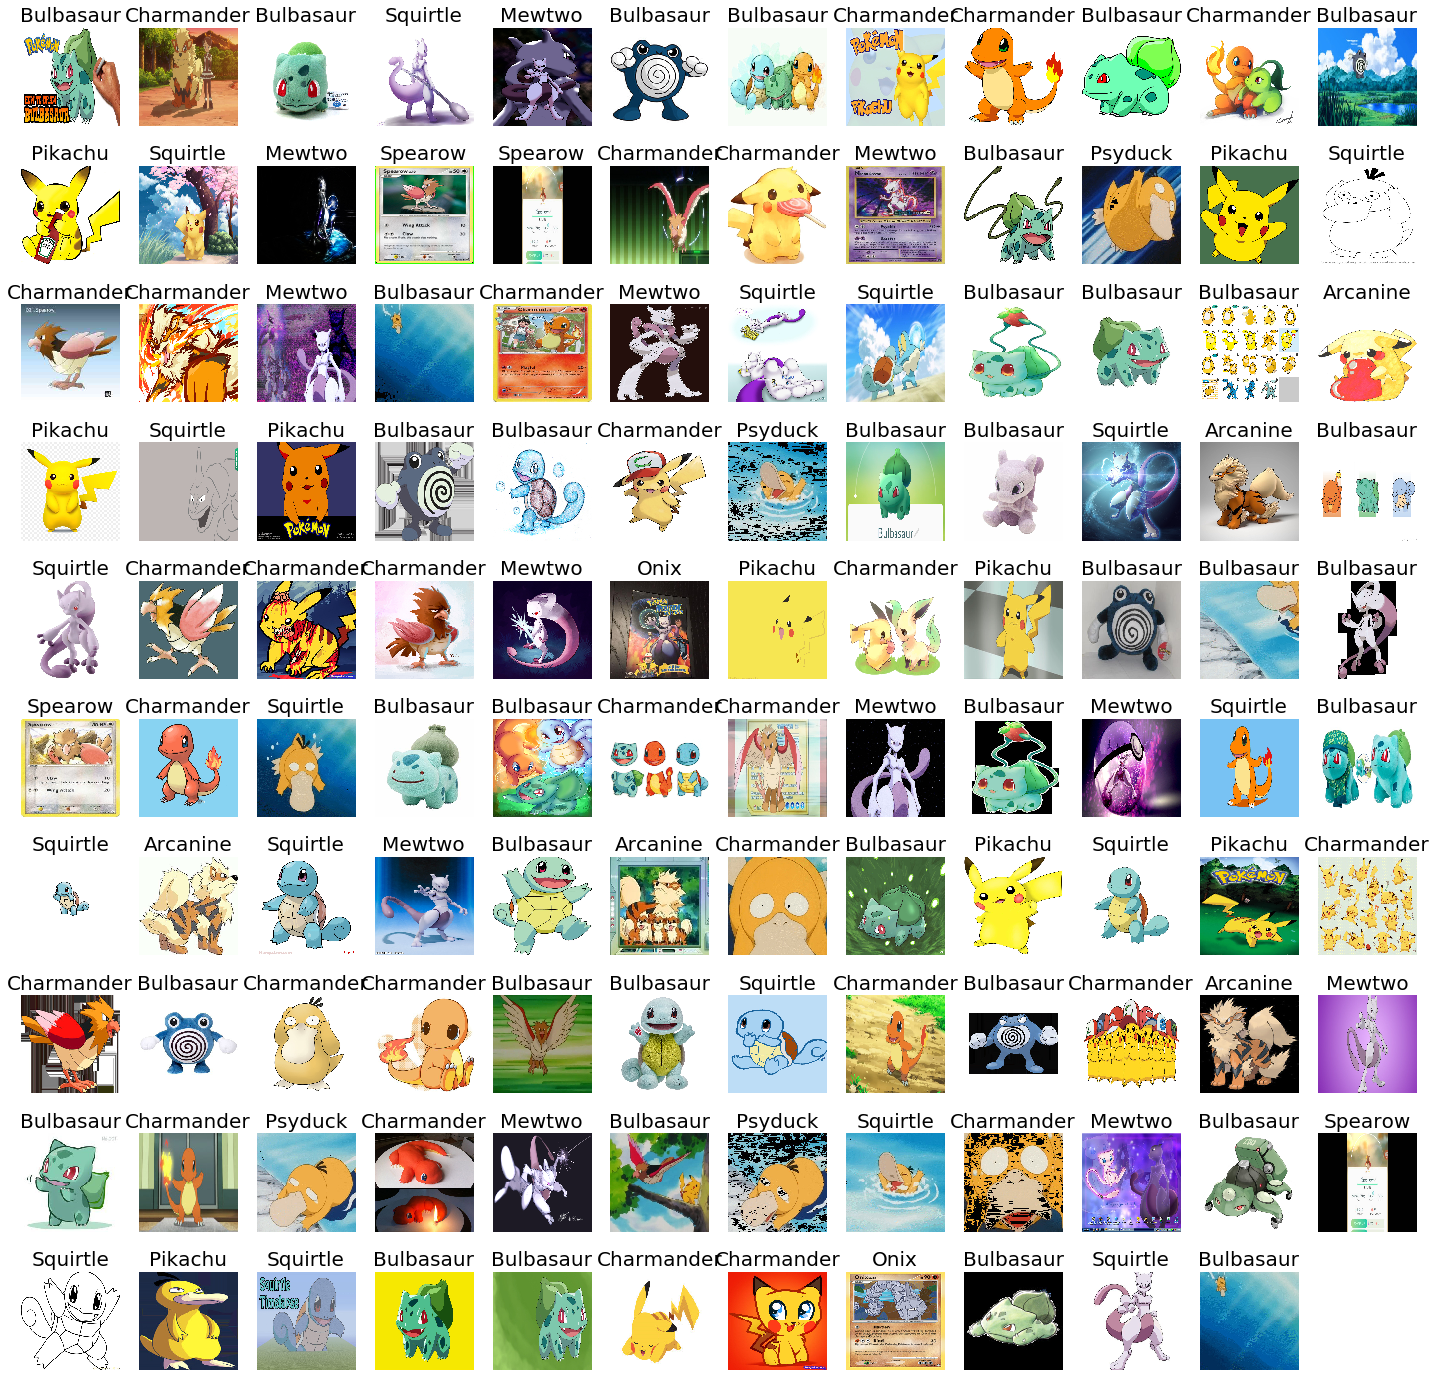

In [27]:

plt.figure(0,figsize=(25,25))

for i in range(1,120):
    plt.subplot(10,12,i)
    plt.title("{}".format(label_to_name[pred1[i]]),fontsize=20)
    plt.axis("off")
    plt.imshow(X_train[i].reshape(100,100,3),cmap='rainbow')
plt.show()  

## MissMatch Image

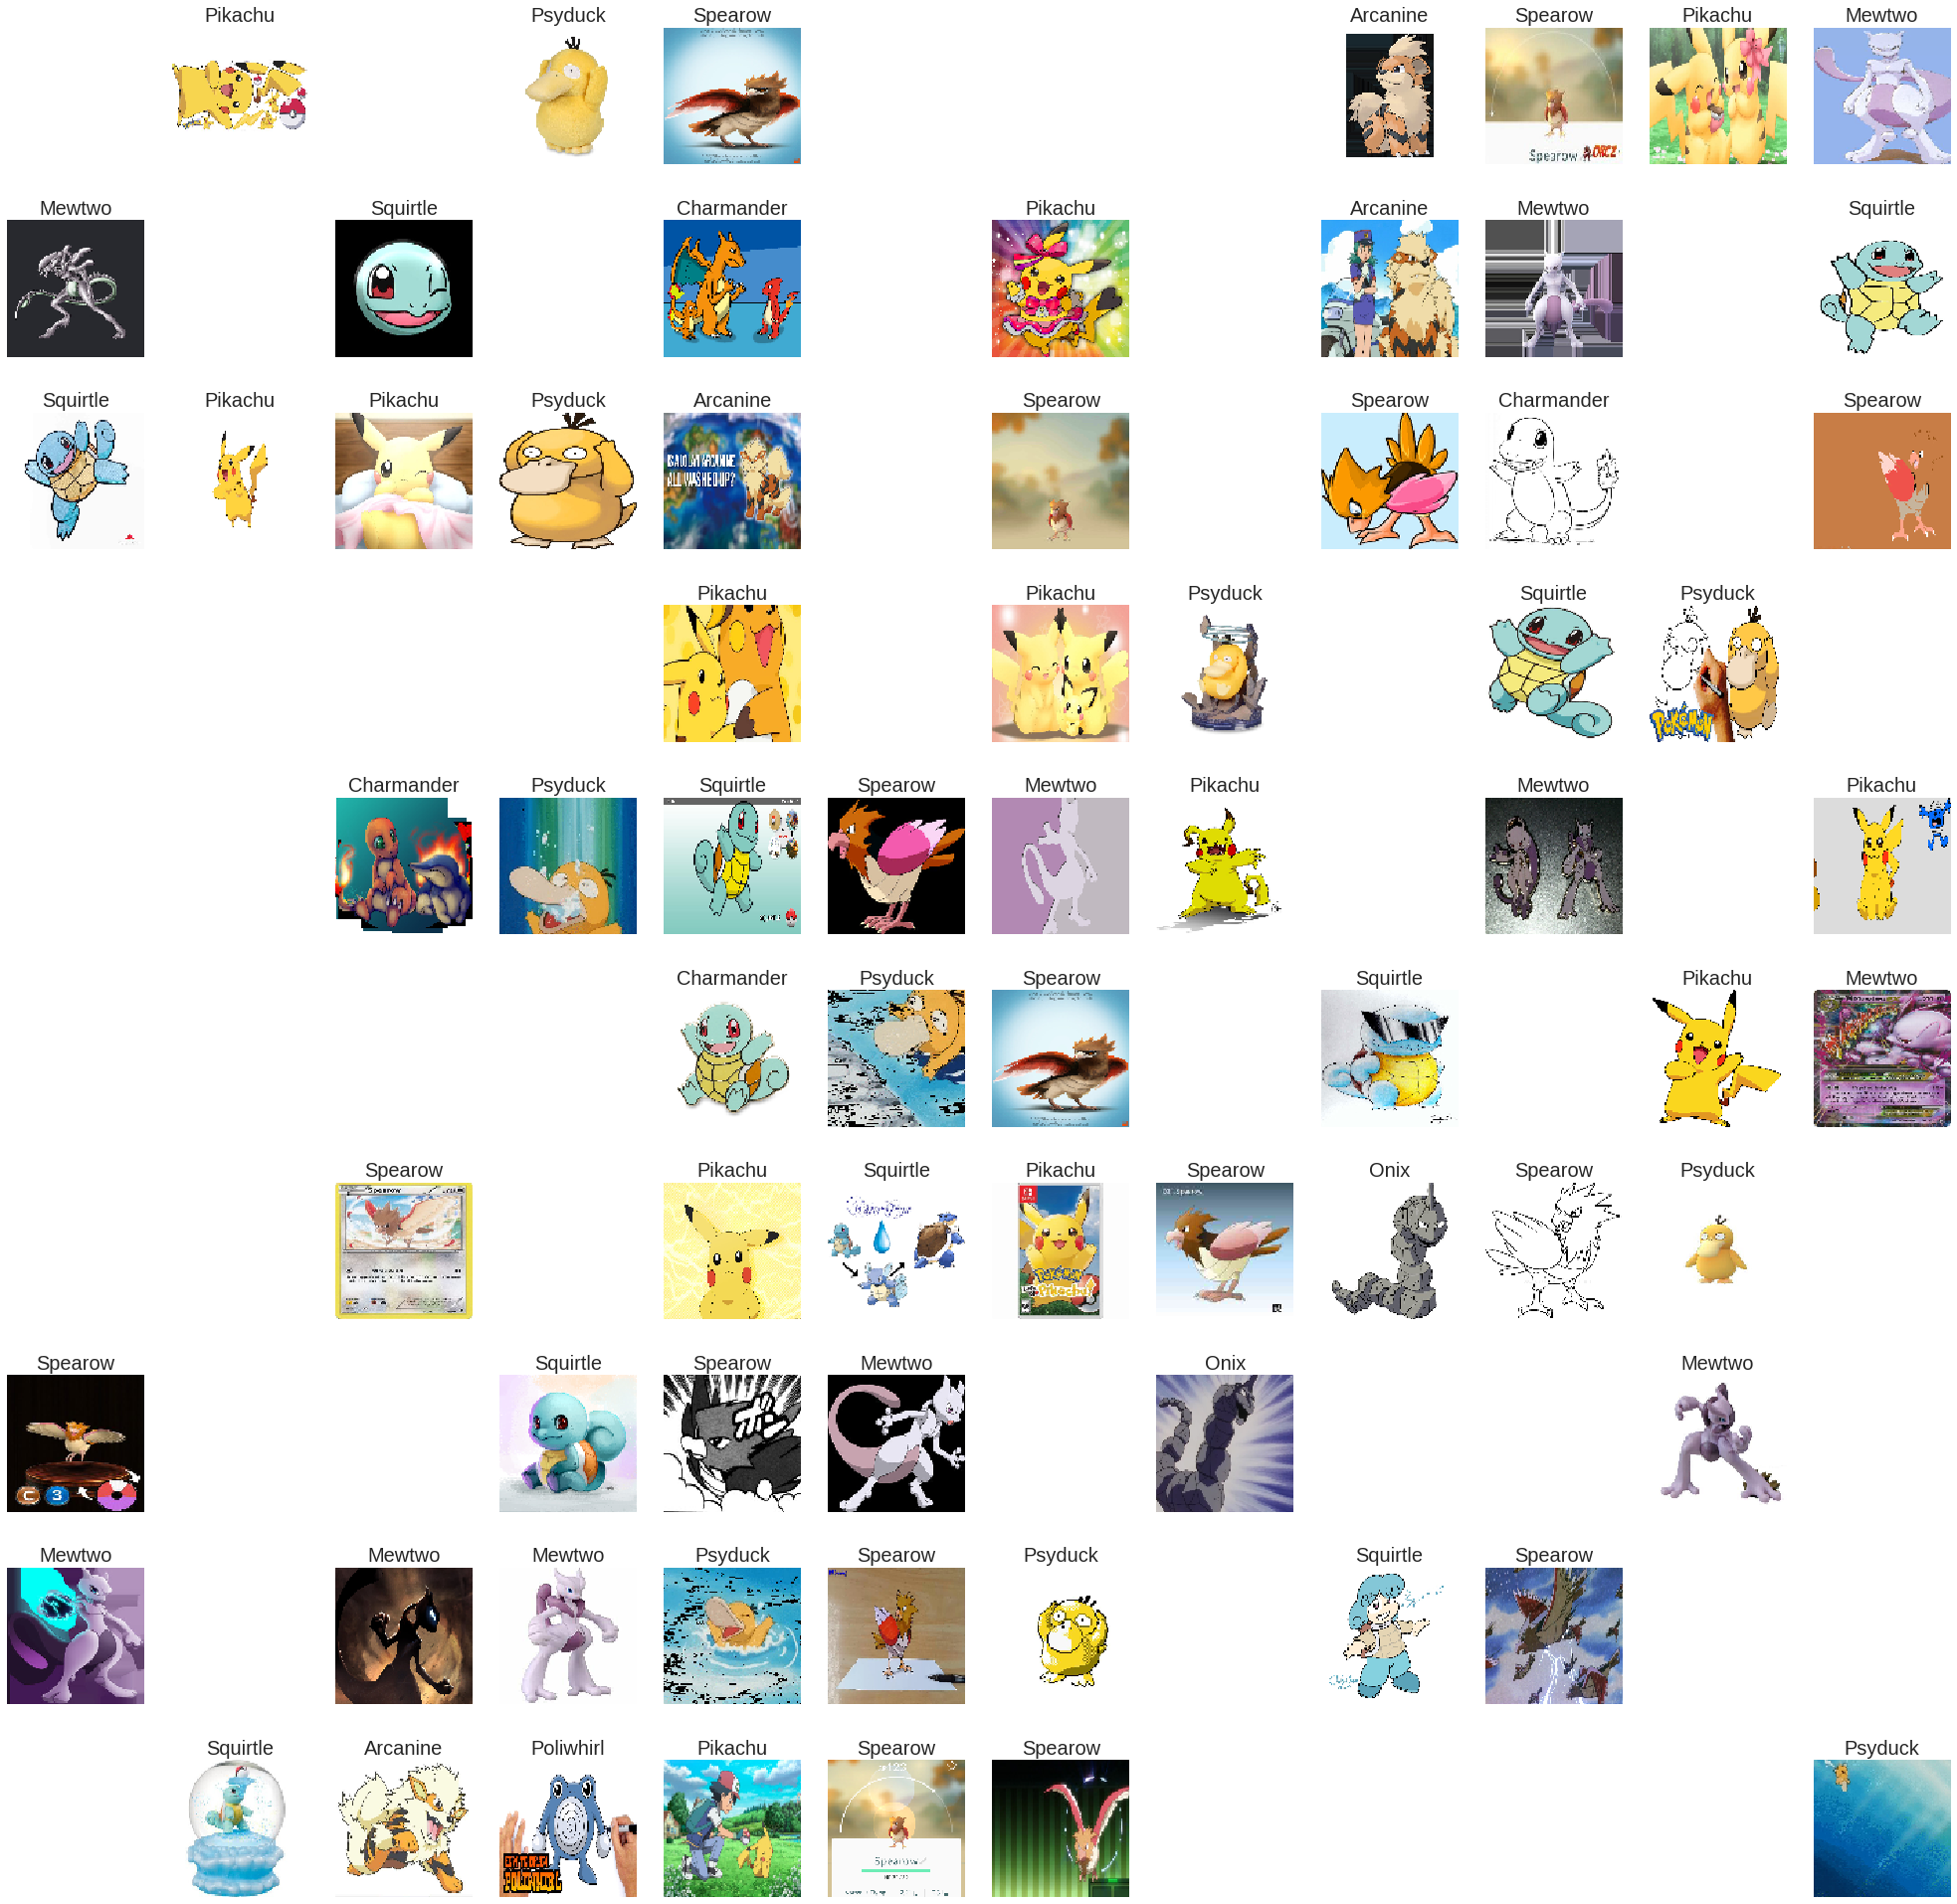

In [53]:
plt.figure(0,figsize=(35,35))
for i in range(1,Y_test.shape[0]-236):
    if y_test[i] != pred[i]:
        plt.subplot(10,12,i)
        img = X_test[i].reshape(100,100,3)
        plt.title("{}".format(label_to_name[y_test[i]]),fontsize=20)
        plt.imshow(img)
        plt.style.use("seaborn")
        plt.axis("off")
        
plt.show()
